<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/main/HitanshuEPLPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week-1 : * Project Initialization and Dataset Acquisition.*




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
file_path = ('/content/drive/MyDrive/dataset - 2020-09-24 (1).csv')
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [2]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [3]:
df.tail()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [4]:
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [5]:
df.shape

(571, 59)

Collected historical EPL match data and player performance datasets from Kaggle

Explored dataset structure, identified target variables, and reviewed sample records.

# Week 2: Data Preprocessing & Feature Selection

# **Check For Missing Values**

In [6]:
df.isnull()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


**Check How Many Missing Values In a Column**

In [7]:
df.isnull().sum()

,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


# Check What Each Column Represent

In [8]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

#  Find Useful Columns And Irrelevant Columns

In [9]:
# Important columns
important_cols = ['Goals', 'Assists', 'Appearances', 'Shots', 'Shooting accuracy %']

# Irrelevant Columns (Not Needed for Performance Prediction):
irrelevant_cols = [
    'Jersey Number', 'Nationality', 'Name'
]

print("\n Useful Columns for Performance Prediction:",important_cols)

print("\n Irrelevant Columns (likely to drop later if needed):",irrelevant_cols)



 Useful Columns for Performance Prediction: ['Goals', 'Assists', 'Appearances', 'Shots', 'Shooting accuracy %']

 Irrelevant Columns (likely to drop later if needed): ['Jersey Number', 'Nationality', 'Name']


# Handle Missing Values & Replace With Mean

In [10]:
import pandas as pd
import numpy as np

# Assume df is your DataFrame

# 1. Identify all numeric columns (including columns with %)
percent_cols = [col for col in df.columns if '%' in col]
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
important_cols = list(set(numeric_cols + percent_cols))  # combine and remove duplicates

# 2. Clean all % columns and convert to numeric
for col in percent_cols:
    df[col] = df[col].astype(str).str.replace('%', '', regex=True).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Replace 0 with NaN in all important numeric columns
df[important_cols] = df[important_cols].replace(0, np.nan)

# 4. Fill missing values (NaN) with column mean
df[important_cols] = df[important_cols].fillna(df[important_cols].mean())

# 5. Optional: ensure all important columns are numeric
df[important_cols] = df[important_cols].apply(pd.to_numeric, errors='coerce')

# Check results
print("Missing Values After Cleaning:")
print(df[important_cols].isna().sum())

print("\nCleaned Important Columns (first 5 rows):")
print(df[important_cols].head())


Missing Values After Cleaning:
Jersey Number             0
Fouls                     0
Assists                   0
Tackle success %          0
Appearances               0
Passes                    0
Throw outs                0
Tackles                   0
Penalties scored          0
Age                       0
Shots                     0
Red cards                 0
Goals with right foot     0
Duels lost                0
Interceptions             0
Aerial battles won        0
Cross accuracy %          0
Aerial battles lost       0
Recoveries                0
Wins                      0
Shooting accuracy %       0
Goals                     0
Big chances missed        0
Blocked shots             0
High Claims               0
Last man tackles          0
Passes per match          0
Punches                   0
Freekicks scored          0
Penalties saved           0
Catches                   0
Big chances created       0
Offsides                  0
Successful 50/50s         0
Clearances off li

# Print Cleaned Important Columns

In [11]:
df[important_cols]

,Jersey Number,Fouls,Assists,Tackle success %,Appearances,Passes,Throw outs,Tackles,Penalties scored,Age,...,Goal Kicks,Losses,Headed goals,Goals per match,Duels won,Headed Clearance,Saves,Goals with left foot,Clean sheets,Yellow cards
0,1.0,70.259861,9.090361,63.597523,64.000000,1783.000000,375.0,120.524941,4.630769,28.0,...,489.000000,16.000000,4.176471,2.922714,369.752266,89.076142,222.000000,5.792271,14.000000,2.000000
1,33.0,70.259861,9.090361,63.597523,81.700624,2747.585417,322.0,120.524941,4.630769,26.0,...,635.022222,29.598698,4.176471,2.922714,369.752266,89.076142,230.733333,5.792271,24.840909,11.866142
2,13.0,70.259861,9.090361,63.597523,81.700624,2747.585417,322.0,120.524941,4.630769,25.0,...,635.022222,29.598698,4.176471,2.922714,369.752266,89.076142,230.733333,5.792271,24.840909,11.866142
3,2.0,125.000000,18.000000,78.000000,160.000000,7125.000000,322.0,214.000000,4.630769,25.0,...,635.022222,37.000000,4.176471,2.922714,611.000000,143.000000,230.733333,3.000000,53.000000,23.000000
4,3.0,9.000000,1.000000,81.000000,16.000000,519.000000,322.0,21.000000,4.630769,23.0,...,635.022222,5.000000,4.176471,2.922714,55.000000,12.000000,230.733333,1.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,7.0,16.000000,4.000000,63.597523,31.000000,399.000000,322.0,11.000000,4.630769,20.0,...,635.022222,7.000000,4.176471,0.100000,369.752266,89.076142,230.733333,2.000000,24.840909,3.000000
567,9.0,81.000000,13.000000,63.597523,78.000000,2108.000000,322.0,51.000000,6.000000,29.0,...,635.022222,23.000000,9.000000,0.410000,369.752266,57.000000,230.733333,4.000000,24.840909,7.000000
568,37.0,80.000000,12.000000,63.597523,105.000000,1434.000000,322.0,86.000000,4.630769,24.0,...,635.022222,47.000000,4.176471,0.050000,369.752266,13.000000,230.733333,5.792271,24.840909,4.000000
569,17.0,70.259861,9.090361,63.597523,1.000000,1.000000,322.0,120.524941,4.630769,18.0,...,635.022222,1.000000,4.176471,1.000000,369.752266,89.076142,230.733333,5.792271,24.840909,11.866142


# Save The Cleaned Dataset

In [12]:
# Load dataset
file_path = '/content/drive/MyDrive/dataset - 2020-09-24 (1).csv'
df = pd.read_csv(file_path)

# (Assume all cleaning steps are already done here)

# Path to save cleaned CSV
cleaned_file_path = '/content/drive/MyDrive/dataset_cleaned_2020-09-24.csv'

# Export cleaned dataframe
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")


Cleaned dataset saved successfully at: /content/drive/MyDrive/dataset_cleaned_2020-09-24.csv


# Import Cleaned Dataset & Encode Categorical Values



In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your cleaned dataset from Drive
df = pd.read_csv('/content/drive/MyDrive/dataset_cleaned_2020-09-24.csv')

# Step 1: Sort dataset by Goals (highest first)
df = df.sort_values(by='Goals', ascending=False)

# Step 2: Encode categorical columns
encode_cols = ['Club', 'Position', 'Home/Away']

label_encoders = {}

for col in encode_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Step 3: Save final fully-processed dataset
df.to_csv('/content/drive/MyDrive/final_encoded_dataset.csv', index=False)

print("✔ Final processed dataset saved successfully!")
print("File path: /content/drive/MyDrive/final_encoded_dataset.csv")
df.head()


✔ Final processed dataset saved successfully!
File path: /content/drive/MyDrive/final_encoded_dataset.csv


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
344,Sergio Agüero,10.0,11,1,Argentina,32.0,263,177,44,180,...,NaN,NaN,NaN,NaN,NaN,NaN,23,1,167,194.0
489,Harry Kane,10.0,16,1,England,27.0,212,120,48,144,...,NaN,NaN,NaN,NaN,NaN,NaN,26,0,208,160.0
281,Jamie Vardy,9.0,9,1,England,33.0,213,86,77,105,...,NaN,NaN,NaN,NaN,NaN,NaN,20,3,179,195.0
342,Raheem Sterling,7.0,11,1,England,25.0,260,161,55,86,...,NaN,NaN,NaN,NaN,NaN,NaN,28,1,297,95.0
313,Sadio Mané,10.0,10,1,Senegal,28.0,196,121,35,86,...,NaN,NaN,NaN,NaN,NaN,NaN,21,3,215,117.0


# View Label Encoding Mappings

In [14]:
for col, le in label_encoders.items():
    print(f"\nEncoding map for {col}:")
    for c, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"{c} → {code}")



Encoding map for Club:
Arsenal → 0
Aston-Villa → 1
Brighton-and-Hove-Albion → 2
Burnley → 3
Chelsea → 4
Crystal-Palace → 5
Everton → 6
Fulham → 7
Leeds-United → 8
Leicester-City → 9
Liverpool → 10
Manchester-City → 11
Manchester-United → 12
Newcastle-United → 13
Sheffield-United → 14
Southampton → 15
Tottenham-Hotspur → 16
West-Bromwich-Albion → 17
West-Ham-United → 18
Wolverhampton-Wanderers → 19

Encoding map for Position:
Defender → 0
Forward → 1
Goalkeeper → 2
Midfielder → 3


Cleaned the dataset by handling missing values, encoding categorical features, and normalizing numerical data.

Selected the most relevant features for match outcome and player performance prediction.

# Week 3: Preliminary Model Training.


#EDA - Exploratory Data Analysis

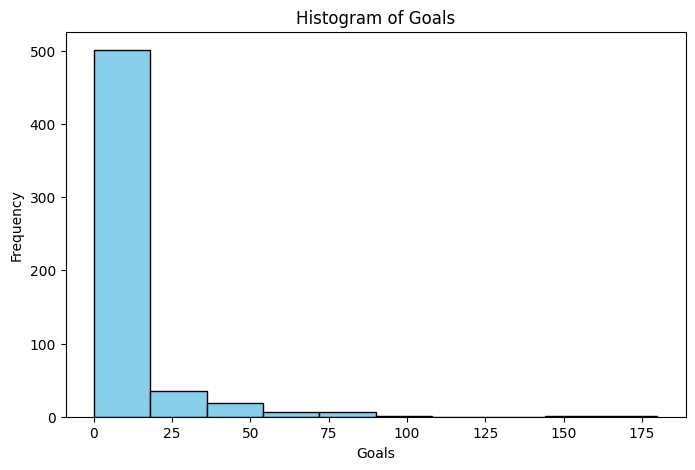

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️ Histogram: Goals vs Frequency
plt.figure(figsize=(8,5))
plt.hist(df['Goals'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()



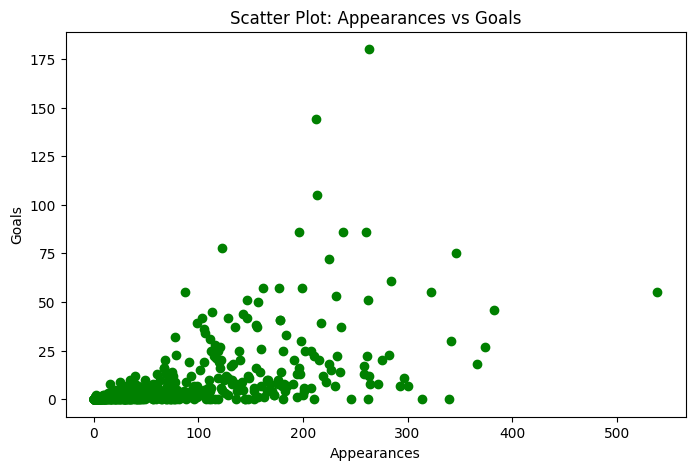

In [16]:

# 2️ Scatter: Appearances vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Appearances'], df['Goals'], color='green')
plt.title('Scatter Plot: Appearances vs Goals')
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.show()


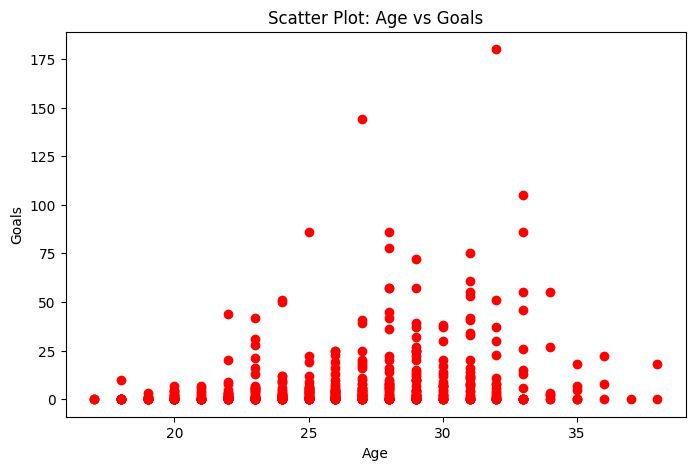

In [17]:

# 3️ Scatter: Age vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Goals'], color='red')
plt.title('Scatter Plot: Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()


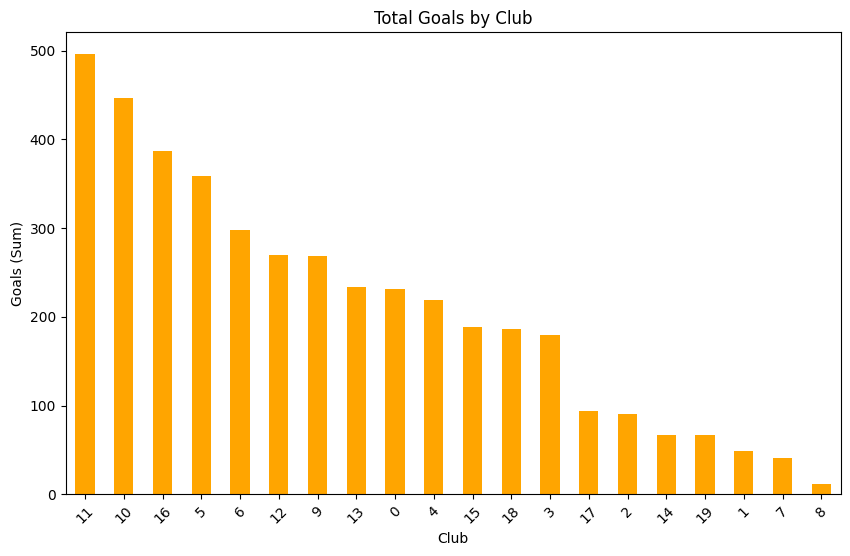

In [18]:

# 4️ Bar Chart: Club vs Total Goals
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
club_goals.plot(kind='bar', color='orange')
plt.title('Total Goals by Club')
plt.xlabel('Club')
plt.ylabel('Goals (Sum)')
plt.xticks(rotation=45)
plt.show()


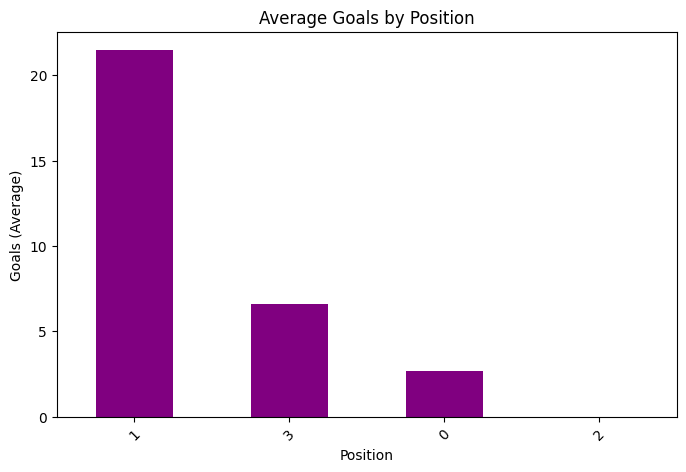

In [19]:

# 5️ Bar Chart: Position vs Average Goals
position_goals = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
position_goals.plot(kind='bar', color='purple')
plt.title('Average Goals by Position')
plt.xlabel('Position')
plt.ylabel('Goals (Average)')
plt.xticks(rotation=45)
plt.show()



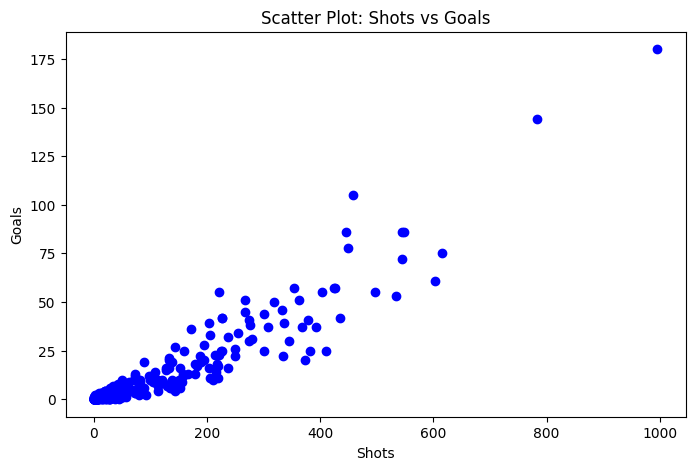

In [20]:
# 6️ Scatter: Shots vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Shots'], df['Goals'], color='blue')
plt.title('Scatter Plot: Shots vs Goals')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.show()



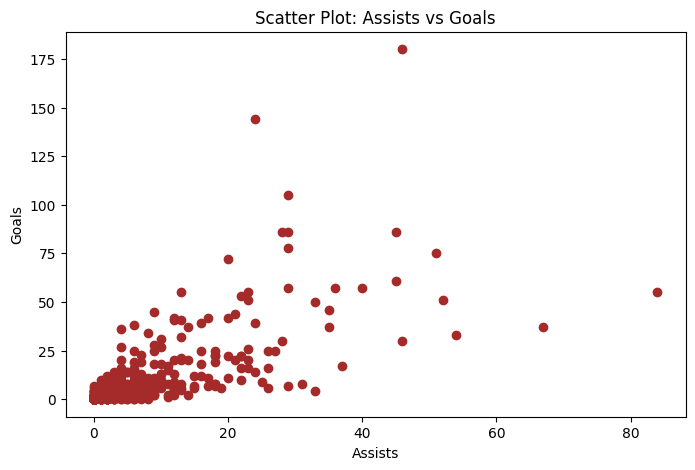

In [21]:
# 7️ Scatter: Assists vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Assists'], df['Goals'], color='brown')
plt.title('Scatter Plot: Assists vs Goals')
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.show()



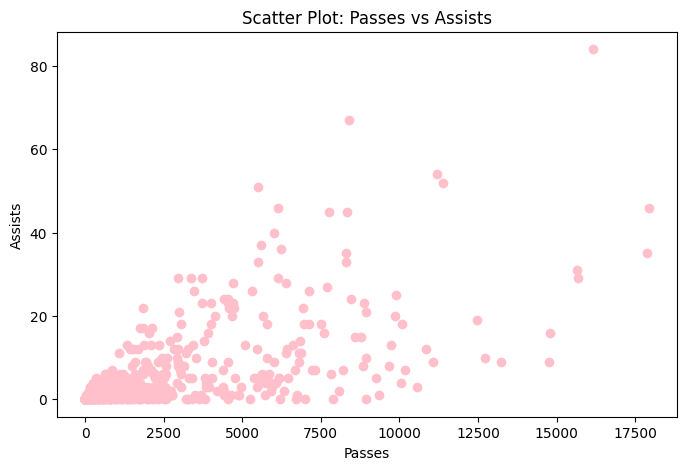

In [22]:
# 8️ Scatter: Passes vs Assists
plt.figure(figsize=(8,5))
plt.scatter(df['Passes'], df['Assists'], color='pink')
plt.title('Scatter Plot: Passes vs Assists')
plt.xlabel('Passes')
plt.ylabel('Assists')
plt.show()


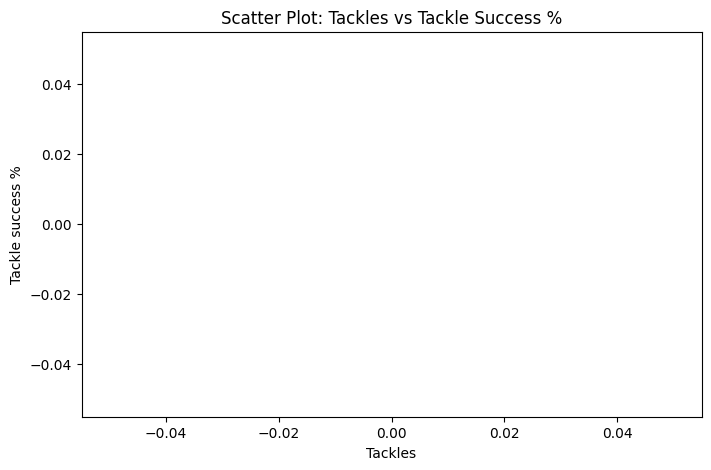

In [23]:
#9 Tackles vs Tackle Success %
import pandas as pd
import matplotlib.pyplot as plt

# Ensure numeric
df['Tackles'] = pd.to_numeric(df['Tackles'], errors='coerce')
df['Tackle success %'] = pd.to_numeric(df['Tackle success %'], errors='coerce')

# Fill NaN with mean safely
df['Tackles'] = df['Tackles'].fillna(df['Tackles'].mean())
df['Tackle success %'] = df['Tackle success %'].fillna(df['Tackle success %'].mean())

# Plot
plt.figure(figsize=(8,5))
plt.scatter(df['Tackles'], df['Tackle success %'], color='cyan')
plt.title('Scatter Plot: Tackles vs Tackle Success %')
plt.xlabel('Tackles')
plt.ylabel('Tackle success %')
plt.show()


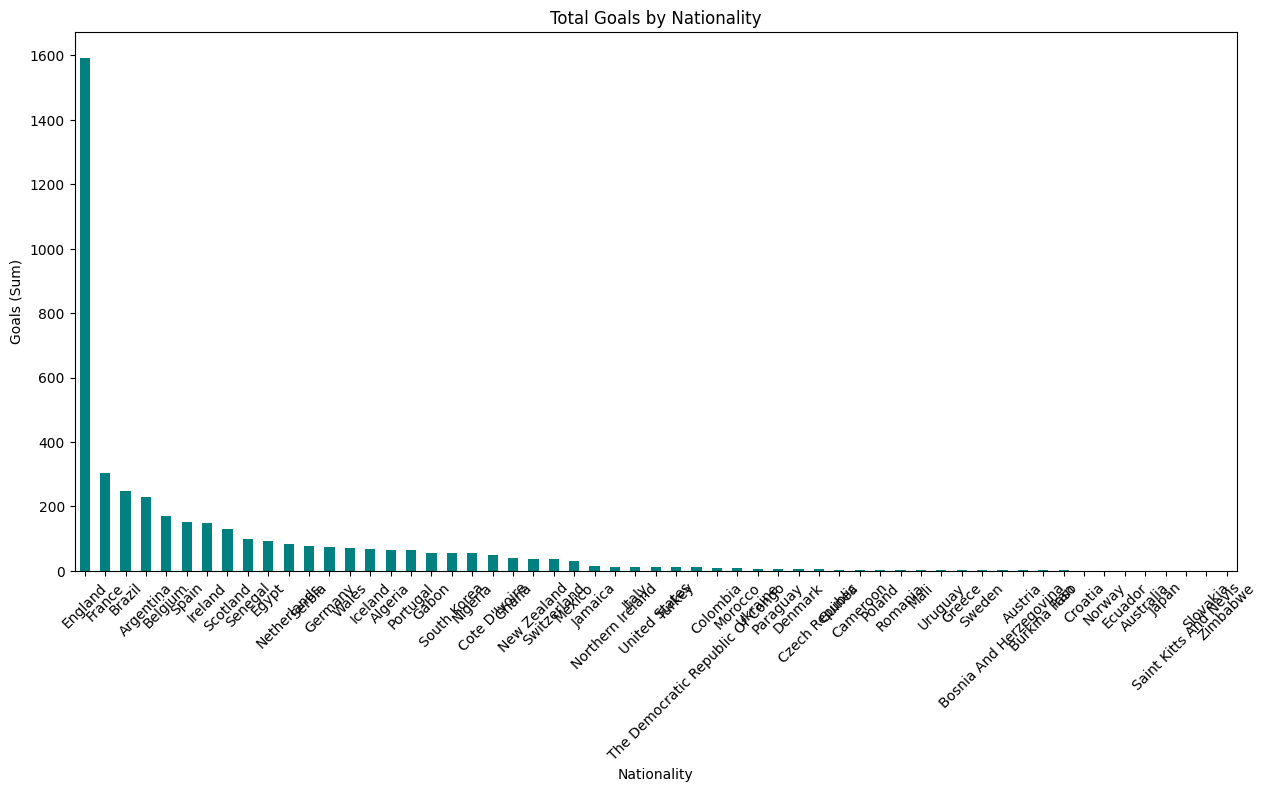

In [24]:
#  Bar Chart: Nationality vs Total Goals
nationality_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,7))
nationality_goals.plot(kind='bar', color='teal')
plt.title('Total Goals by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Goals (Sum)')
plt.xticks(rotation=45)
plt.show()

Raw values of Goals, Appearances, Passes:

     Goals  Appearances  Passes
344    180          263    6134
489    144          212    4408
281    105          213    2961
342     86          260    8317
313     86          196    6136 

Min-Max Scaled values (first 5 rows):

        Goals  Appearances    Passes   Assists
344  1.000000     0.487941  0.342070  0.547619
489  0.800000     0.393321  0.245818  0.285714
281  0.583333     0.395176  0.165124  0.345238
342  0.477778     0.482375  0.463808  0.535714
313  0.477778     0.363636  0.342182  0.345238 

Standardized values (first 5 rows):

         Goals     Shots    Passes
344  10.280718  6.173932  1.223976
489   8.137320  4.702131  0.671565
281   5.815306  2.456424  0.208449
342   4.684069  3.057583  1.922650
313   4.684069  2.366596  1.224616 



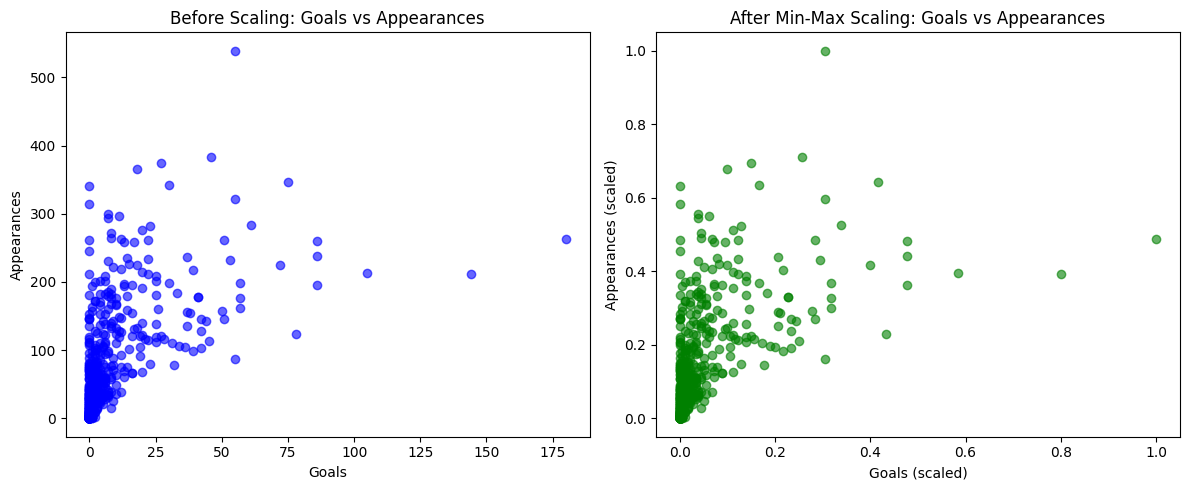

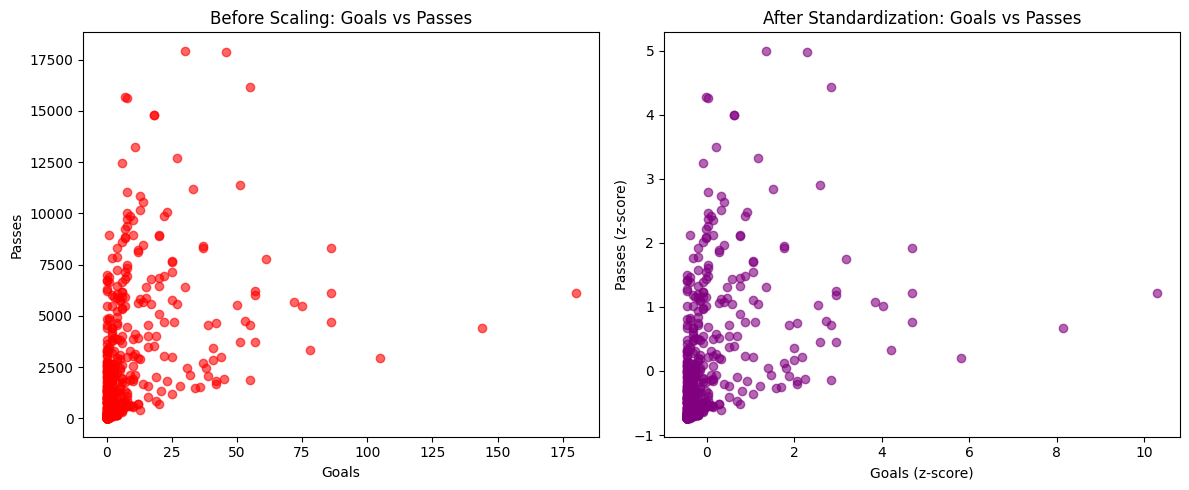

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Print raw values of Goals, Appearances, and Passes
print("Raw values of Goals, Appearances, Passes:\n")
print(df[['Goals', 'Appearances', 'Passes']].head(), "\n")

# Step 2: Apply Min-Max Scaler for Goals, Appearances, Passes, Assists
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[['Goals', 'Appearances', 'Passes', 'Assists']] = minmax_scaler.fit_transform(
    df[['Goals', 'Appearances', 'Passes', 'Assists']]
)

print("Min-Max Scaled values (first 5 rows):\n")
print(df_minmax_scaled[['Goals', 'Appearances', 'Passes', 'Assists']].head(), "\n")

# Step 3: Apply Standardization (Z-score) for Goals, Shots, Passes
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['Goals', 'Shots', 'Passes']] = standard_scaler.fit_transform(
    df[['Goals', 'Shots', 'Passes']]
)

print("Standardized values (first 5 rows):\n")
print(df_standard_scaled[['Goals', 'Shots', 'Passes']].head(), "\n")

# Step 4: Plot scatter before scaling vs after scaling

# Scatter before scaling: Goals vs Appearances
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['Goals'], df['Appearances'], color='blue', alpha=0.6)
plt.title('Before Scaling: Goals vs Appearances')
plt.xlabel('Goals')
plt.ylabel('Appearances')

# Scatter after Min-Max scaling: Goals vs Appearances
plt.subplot(1,2,2)
plt.scatter(df_minmax_scaled['Goals'], df_minmax_scaled['Appearances'], color='green', alpha=0.6)
plt.title('After Min-Max Scaling: Goals vs Appearances')
plt.xlabel('Goals (scaled)')
plt.ylabel('Appearances (scaled)')

plt.tight_layout()
plt.show()

# Scatter before scaling: Goals vs Passes
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['Goals'], df['Passes'], color='red', alpha=0.6)
plt.title('Before Scaling: Goals vs Passes')
plt.xlabel('Goals')
plt.ylabel('Passes')

# Scatter after Standardization: Goals vs Passes
plt.subplot(1,2,2)
plt.scatter(df_standard_scaled['Goals'], df_standard_scaled['Passes'], color='purple', alpha=0.6)
plt.title('After Standardization: Goals vs Passes')
plt.xlabel('Goals (z-score)')
plt.ylabel('Passes (z-score)')

plt.tight_layout()
plt.show()


Create some regression models and train them on the pre-processed data to predict outcomes.

plot the graphs using matplotlib


# Week 4: Predictions and fine tuning the model.


#1. Train–Test Split (75% – 25%)

In [26]:
df['Win_Class'] = df.apply(
    lambda row: 'Win' if row['Wins'] > row['Losses']
    else 'Loss' if row['Losses'] > row['Wins']
    else 'Draw',
    axis=1
)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Win_Class'] = le.fit_transform(df['Win_Class'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# -----------------------------
# Targets & Features
# -----------------------------
regression_target = 'Goals'
regression_features = ['Assists', 'Shots', 'Passes']

classification_target = 'Win_Class'
classification_features = ['Goals', 'Assists', 'Shots', 'Passes']

# -----------------------------
# Create Win_Class safely
# -----------------------------
df['Win_Class'] = df.apply(
    lambda r: 'Win' if r['Wins'] > r['Losses']
    else 'Loss' if r['Losses'] > r['Wins']
    else 'Draw',
    axis=1
)

# Encode target
le = LabelEncoder()
df['Win_Class'] = le.fit_transform(df['Win_Class'])

# -----------------------------
# Regression split
# -----------------------------
X_reg = df[regression_features]
y_reg = df[regression_target]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# -----------------------------
# Classification split
# -----------------------------
X_clf = df[classification_features]
y_clf = df[classification_target]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42
)

# -----------------------------
# Handle missing values
# -----------------------------
imputer = SimpleImputer(strategy='mean')

X_train_reg = imputer.fit_transform(X_train_reg)
X_test_reg = imputer.transform(X_test_reg)

X_train_clf = imputer.fit_transform(X_train_clf)
X_test_clf = imputer.transform(X_test_clf)



# 2. Baseline Regression – Linear Regression & Logistic Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_reg = lr.predict(X_test_reg)

print("Linear Regression trained successfully.")

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_clf = log_reg.predict(X_test_clf)

print("Logistic Regression trained successfully.")


Linear Regression trained successfully.
Logistic Regression trained successfully.


# Model Evaluation: Regression Metrics

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lr = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2_lr = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Performance:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


Linear Regression Performance:
MAE: 6.031866232698705
RMSE: 9.178402373101346
R2: 0.8172425679156966


# Classification Metrics

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Logistic Regression Performance:
Accuracy: 0.5454545454545454
Precision: 0.5697414875133708
Recall: 0.5454545454545454
F1 Score: 0.5153532808474405
Confusion Matrix:
 [[24  1  0]
 [ 6 36 11]
 [ 6 41 18]]


# Visualization Task

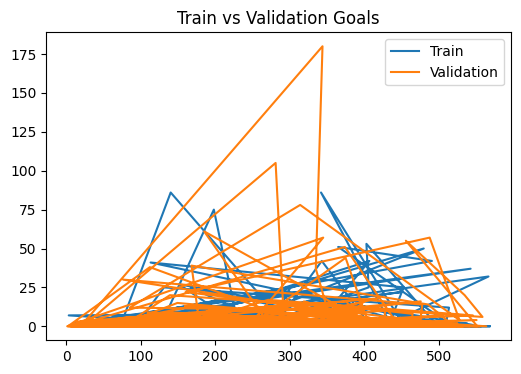

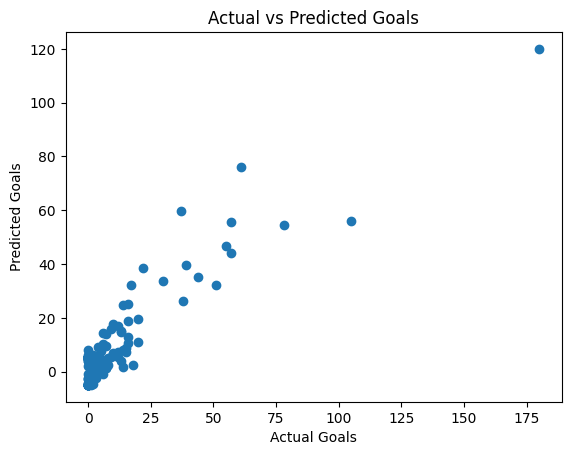

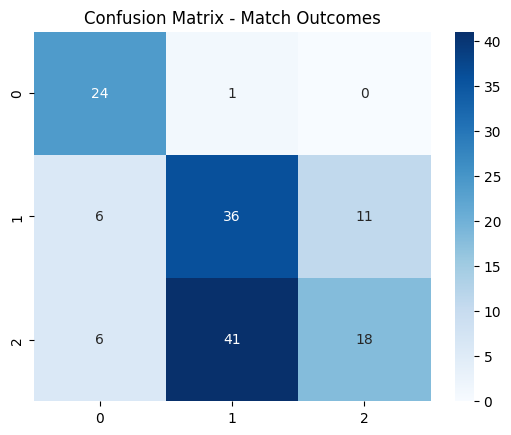

In [30]:
import matplotlib.pyplot as plt

# Loss curve (train vs validation) for regression
plt.figure(figsize=(6,4))
plt.plot(y_train_reg[:len(y_test_reg)], label='Train')
plt.plot(y_test_reg, label='Validation')
plt.title("Train vs Validation Goals")
plt.legend()
plt.show()

# Actual vs Predicted scatter plot (regression)
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()

# Confusion matrix (classification)
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Match Outcomes")
plt.show()


Make predictions with the model.

Change different hyper parameters to give the model more opportunity to learn

# Week 5: Fine tune the data and try out more model architectures.


#Advanced Models
Regression: Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)


Classification: **XGBoost**

In [32]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb = xgb_clf.predict(X_test_clf)



# Hyperparameter Tuning Example

In [33]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_rf.fit(X_train_reg, y_train_reg)
print("Best RF Params:", grid_rf.best_params_)


Best RF Params: {'max_depth': None, 'n_estimators': 50}


In [48]:

#GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = df[['Assists', 'Shots', 'Appearances']]
y = df['Goals']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Tuned Random Forest R²:", r2_score(y_test, y_pred))
print("Tuned Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest R²: 0.8494512192411243
Tuned Random Forest RMSE: 8.330444793167503


# Regression Performance Comparison (Player Performance)

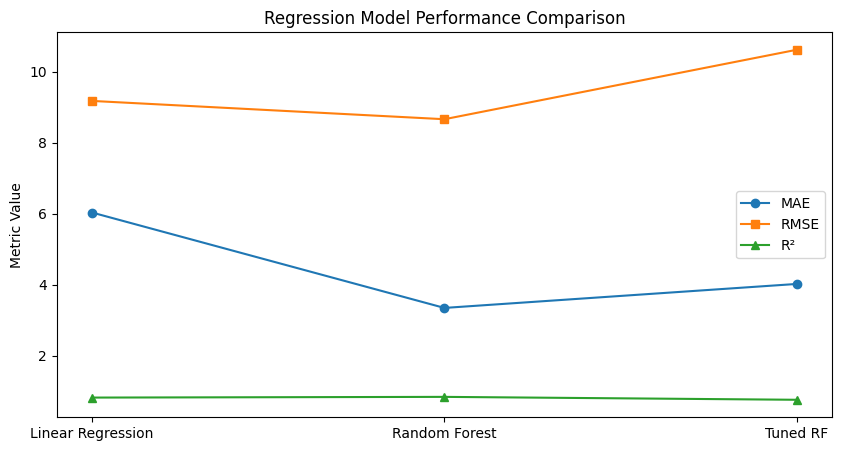

In [35]:
import matplotlib.pyplot as plt

# Collect regression metrics
models_reg = ['Linear Regression', 'Random Forest', 'Tuned RF']
mae_values = [
    mean_absolute_error(y_test_reg, y_pred_reg),
    mean_absolute_error(y_test_reg, y_pred_rf),
    mean_absolute_error(y_test_reg, y_pred_rf_tuned)
]
rmse_values = [
    np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)),
    np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_tuned))
]
r2_values = [
    r2_score(y_test_reg, y_pred_reg),
    r2_score(y_test_reg, y_pred_rf),
    r2_score(y_test_reg, y_pred_rf_tuned)
]

plt.figure(figsize=(10,5))
plt.plot(models_reg, mae_values, marker='o', label='MAE')
plt.plot(models_reg, rmse_values, marker='s', label='RMSE')
plt.plot(models_reg, r2_values, marker='^', label='R²')
plt.title('Regression Model Performance Comparison')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


# Classification Performance Comparison (Match Outcomes)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_model.predict(X_test_clf)

rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_tuned.fit(X_train_clf, y_train_clf)
y_pred_rf_tuned = rf_tuned.predict(X_test_clf)


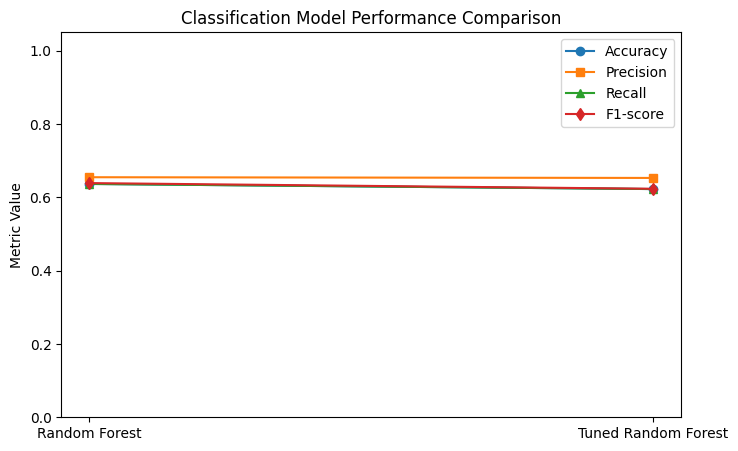

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models_clf = ['Random Forest', 'Tuned Random Forest']
y_pred_clf_list = [y_pred_rf, y_pred_rf_tuned]

accuracy_values = [accuracy_score(y_test_clf, p) for p in y_pred_clf_list]
precision_values = [precision_score(y_test_clf, p, average='weighted') for p in y_pred_clf_list]
recall_values = [recall_score(y_test_clf, p, average='weighted') for p in y_pred_clf_list]
f1_values = [f1_score(y_test_clf, p, average='weighted') for p in y_pred_clf_list]

plt.figure(figsize=(8,5))
plt.plot(models_clf, accuracy_values, marker='o', label='Accuracy')
plt.plot(models_clf, precision_values, marker='s', label='Precision')
plt.plot(models_clf, recall_values, marker='^', label='Recall')
plt.plot(models_clf, f1_values, marker='d', label='F1-score')

plt.title('Classification Model Performance Comparison')
plt.ylabel('Metric Value')
plt.ylim(0, 1.05)
plt.legend()
plt.show()


• Looking back at the data to see any more improvements that can be made.

• Retrain the model with new data and train the new models.

• Compare different models’ performance.


# Week 6: Inference with the test data.


#Train Models Save

In [38]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import joblib

# Classification model
clf_model = LogisticRegression(max_iter=5000)
clf_model.fit(X_train_clf, y_train_clf)

# Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Save models
joblib.dump(clf_model, "match_outcome_model.pkl")
joblib.dump(reg_model, "player_performance_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(imputer, "imputer.pkl")


['imputer.pkl']

# Reload Models (Inference Phase)

In [39]:
clf_model = joblib.load("match_outcome_model.pkl")
reg_model = joblib.load("player_performance_model.pkl")
le = joblib.load("label_encoder.pkl")
imputer = joblib.load("imputer.pkl")


# Run Predictions on Test Data

In [40]:
# Classification prediction
y_pred_clf = clf_model.predict(X_test_clf)

# Regression prediction
y_pred_reg = reg_model.predict(X_test_reg)


# Compare Actual vs Predicted (Metrics)

**Classification Metrics**

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print("----- CLASSIFICATION METRICS -----")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


----- CLASSIFICATION METRICS -----
Accuracy : 0.6083916083916084
Precision: 0.623071683561194
Recall   : 0.6083916083916084
F1 Score : 0.6115355885393408


**Regression Metrics**

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("----- REGRESSION METRICS -----")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)


----- REGRESSION METRICS -----
MAE : 6.031866232698705
MSE : 84.24307012255242
RMSE: 9.178402373101346


In [71]:
regression_error = (mae / np.mean(y_test_reg)) * 100
print("Regression Error %:", regression_error)


Regression Error %: 64.0829770635895


# Visualize Errors

**Regression Residual Plot**

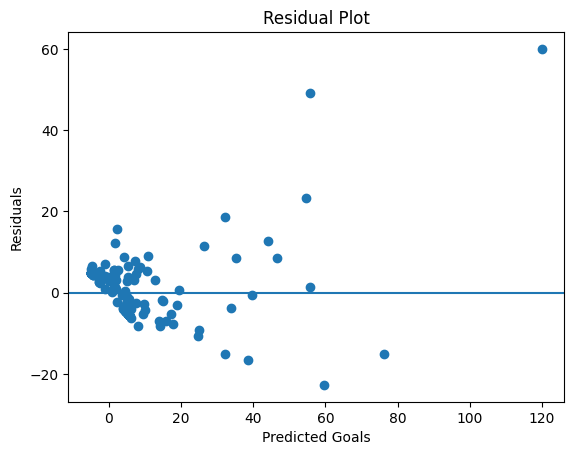

In [72]:
import matplotlib.pyplot as plt

residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals)
plt.axhline(0)
plt.xlabel("Predicted Goals")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Classification Confusion Matrix**

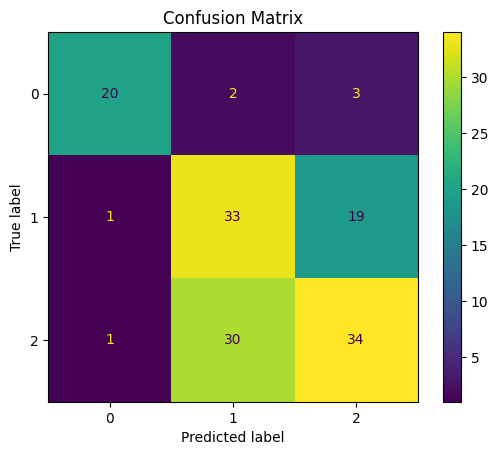

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_clf)
plt.title("Confusion Matrix")
plt.show()


Load the model separately and test it out to see if the model’s performance is satisfactory.

Go back to pre-processing and training and adjust parameters to see if better performance can be
achieved


# Week 7: Build a Full stack app for users to use your model.


# Build a Simple Application (2 Screens)

In [74]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = xgb_clf.predict(X_test_clf)


In [75]:
import os
os.makedirs("models", exist_ok=True)


• To let everyone use the model in a easier way with a GUI. Build a simple website with 2 screens to use the
model.


• Load the models and encoders in the backend and make use of pipelines to make the process more
streamlined.
